In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
from sklearn.model_selection import train_test_split
car = pd.read_csv('CarPrice_Assignment.csv')
car['CarName'] = car['CarName'].apply(lambda x : x.split()[0])
car,car_te = train_test_split(car,train_size = 0.7,test_size=0.3,random_state=42)
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [264]:
#drop useless IDs
car = car.drop(['car_ID'],axis=1)

In [265]:
car.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.846154   98.930070  174.655245   65.988811   53.791608   
std      1.235095    6.073737   12.407288    2.181939    2.480075   
min     -2.000000   86.600000  144.600000   61.800000   47.800000   
25%      0.000000   94.500000  166.800000   64.200000   52.000000   
50%      1.000000   97.200000  173.400000   65.500000   54.100000   
75%      2.000000  102.200000  184.600000   66.900000   55.700000   
max      3.000000  115.600000  202.600000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   143.000000  143.000000  143.000000  143.000000        143.000000   
mean   2573.237762  127.013986    3.320559    3.257552          9.983986   
std     522.368306   41.436526    0.272339    0.307434          3.745026   
min    1819.000000   70.000000    2.540000    2.070000          7.000000   
25%    2190.500000   98.000000    3.150000    3.115000          8.550000   
50%    2443.000000  120.000000    3.310000    3.270000          9.000000   
75%    2953.000000  141.000000    3.540000    3.405000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  143.000000   143.000000  143.000000  143.000000    143.000000  
mean   105.699301  5154.545455   24.818182   30.321678  13408.503497  
std     40.343950   487.191907    5.915647    6.232131   7834.464872  
min     52.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     74.500000  4800.000000   19.000000   25.000000   7896.500000  
50%     95.000000  5200.000000   24.000000   30.000000  10795.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16572.500000  
max    288.000000  6600.000000   38.000000   47.000000  45400.000000

In [266]:
#numeric
nn_car = car[car.columns[~car.columns.isin(car._get_numeric_data().columns)]]
nn_car.head()

CarName fueltype aspiration doornumber    carbody drivewheel  \
177   toyota      gas        std       four  hatchback        fwd   
75   mercury      gas      turbo        two  hatchback        rwd   
174   toyota   diesel      turbo       four      sedan        fwd   
31     honda      gas        std        two  hatchback        fwd   
12       bmw      gas        std        two      sedan        rwd   

    enginelocation enginetype cylindernumber fuelsystem  
177          front        ohc           four       mpfi  
75           front        ohc           four       mpfi  
174          front        ohc           four        idi  
31           front        ohc           four       1bbl  
12           front        ohc            six       mpfi

In [267]:
#non-mumeric
n_car = car[car.columns[car.columns.isin(car._get_numeric_data().columns)]]
n_car.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
177         -1      102.4      175.6      66.5       53.9        2458   
75           1      102.7      178.4      68.0       54.8        2910   
174         -1      102.4      175.6      66.5       54.9        2480   
31           2       86.6      144.6      63.9       50.8        1819   
12           0      101.2      176.8      64.8       54.3        2710   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
177         122       3.31    3.54               8.7          92     4200   
75          140       3.78    3.12               8.0         175     5000   
174         110       3.27    3.35              22.5          73     4500   
31           92       2.91    3.41               9.2          76     6000   
12          164       3.31    3.19               9.0         121     4250   

     citympg  highwaympg    price  
177       27          32  11248.0  
75        19          24  16503.0  
174       30          33  10698.0  
31        31          38   6855.0  
12        21          28  20970.0

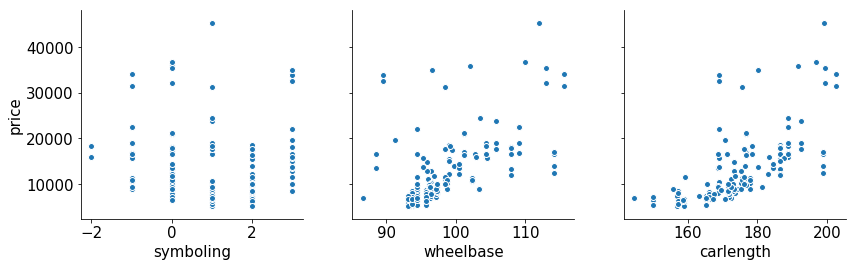

In [268]:
var = ['symboling' , 'wheelbase' , 'carlength']
sns.pairplot(n_car,x_vars=var,y_vars='price',size=4)
plt.show()

####  Symboling = -2 and 2 look lower end , will have to check significance
####  Wheelbase = seems to be increasing with base size but so is the variablity
#### carlength = seems to be increasing with base size but so is the variablity

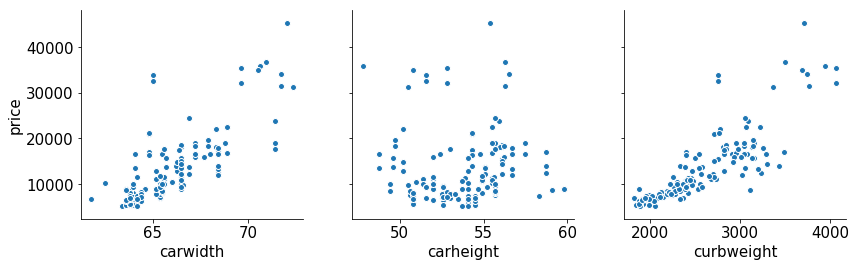

In [269]:
var = ['carwidth','carheight','curbweight']
sns.pairplot(n_car,x_vars=var,y_vars='price',size=4)
plt.show()

####  carwidth = seems to be increasing with base size but so is the variablity
####  carheight = increasing extremely gradually
#### curbweight = seems to be increasing with base size but so is the variablity

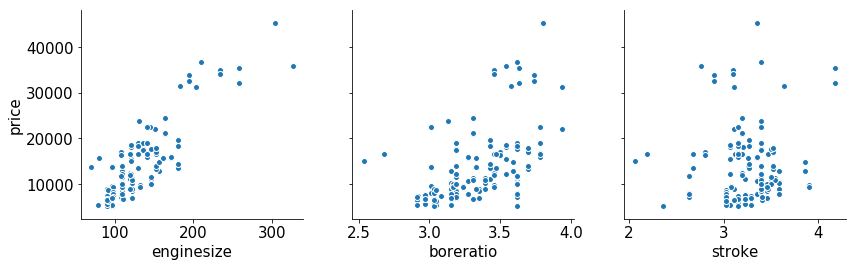

In [270]:
var = ['enginesize','boreratio','stroke']
sns.pairplot(n_car,x_vars=var,y_vars='price',size=4)
plt.show()

####  enginesize = seems to be increasing with base size , variablity looks almost fixed
####  boreratio = seems to be increasing with base size but so is the variablity
#### stroke = seems like just noise

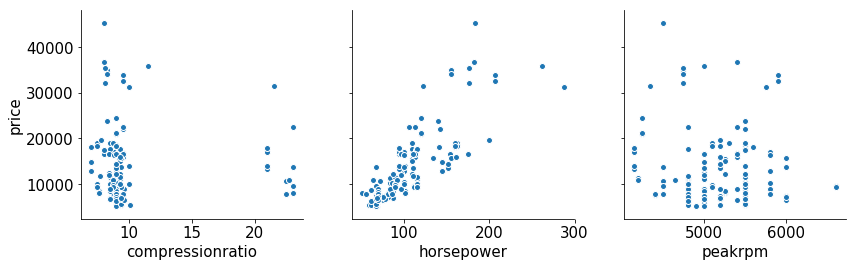

In [271]:
var = ['compressionratio','horsepower','peakrpm']
sns.pairplot(n_car,x_vars=var,y_vars='price',size=4)
plt.show()

####  compressionratio = samples are clustered and varying this might not change price
####  but highest price are clustered in 7.5 to 10 and not 20-22.5
####  horsepower = seems to be increasing with base size but so is the variablity
#### peakrpm = can't see a pattern

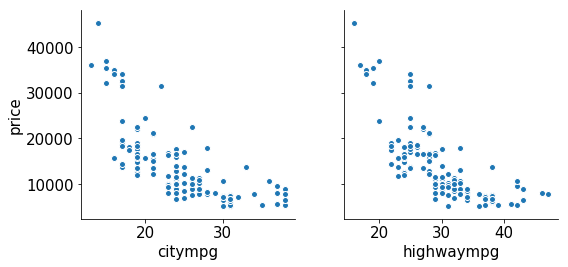

In [272]:
var = ['citympg','highwaympg']
sns.pairplot(n_car,x_vars=var,y_vars='price',size=4)
plt.show()

####  citympg = price reducing with increase
#### highwaympg = price reducing with increase

In [273]:
nn_car.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

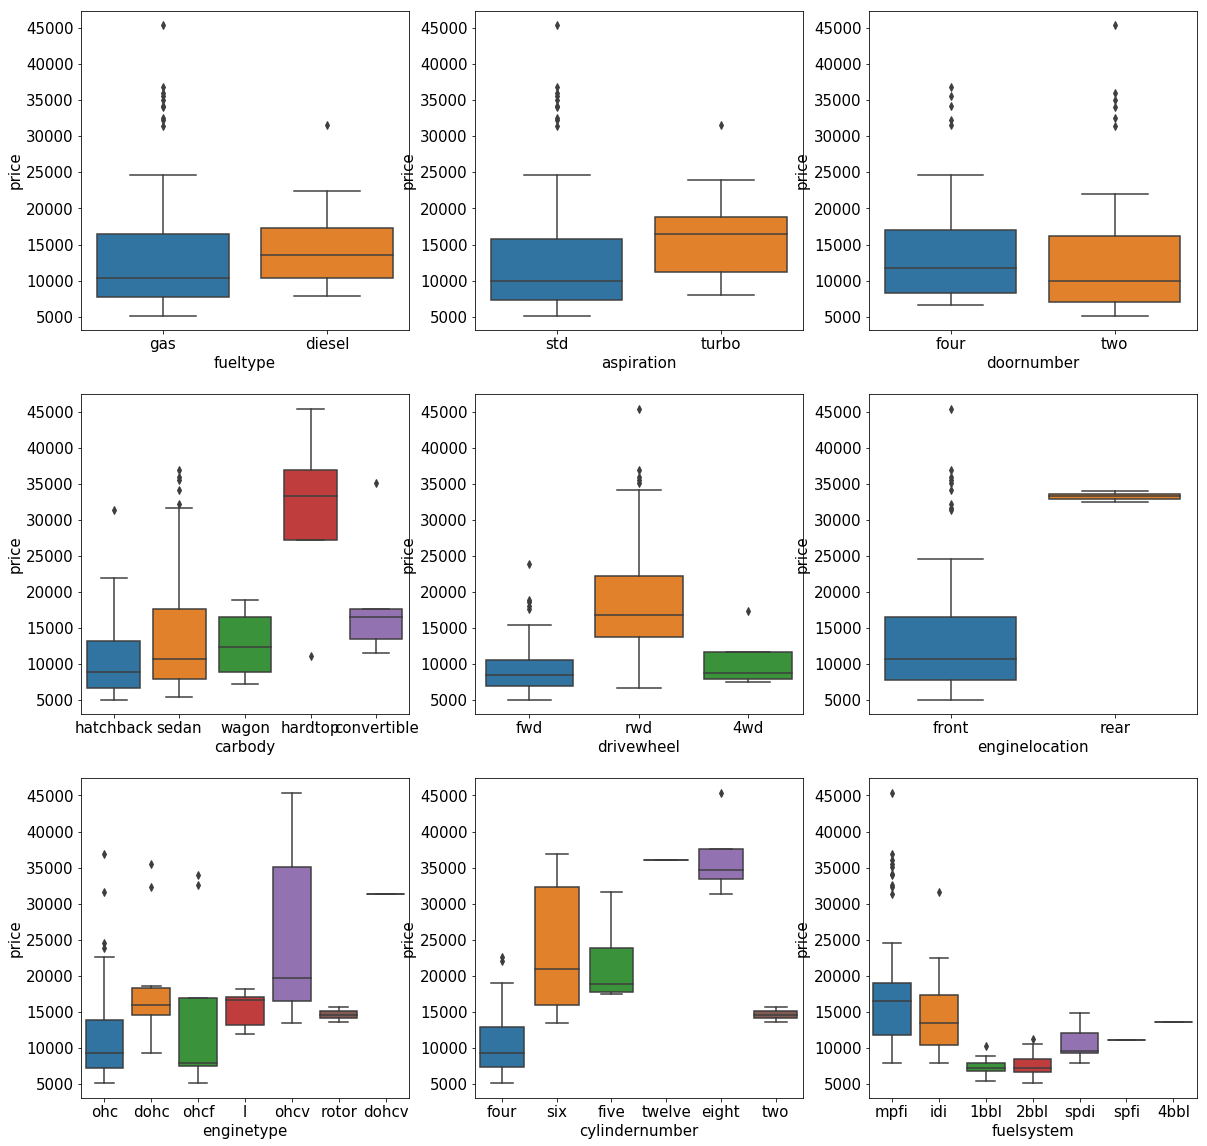

In [274]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype',y='price',data=car)
plt.subplot(3,3,2)
sns.boxplot(x='aspiration',y='price',data=car)
plt.subplot(3,3,3)
sns.boxplot(x='doornumber',y='price',data=car)
plt.subplot(3,3,4)
sns.boxplot(x='carbody',y='price',data=car)
plt.subplot(3,3,5)
sns.boxplot(x='drivewheel',y='price',data=car)
plt.subplot(3,3,6)
sns.boxplot(x='enginelocation',y='price',data=car)
plt.subplot(3,3,7)
sns.boxplot(x='enginetype',y='price',data=car)
plt.subplot(3,3,8)
sns.boxplot(x='cylindernumber',y='price',data=car)
plt.subplot(3,3,9)
sns.boxplot(x='fuelsystem',y='price',data=car)
plt.show()

#### fueltype - disel seems much more expensive but not significantly
#### aspiration - turbo seems much more expensive
#### door numbers - four seems much more expensive but not significantly
#### carbody - the different types do help with varying price
#### drivewheel - rwd costliest 
#### enginelocation - rear engines much more expensive
#### enginetype - ohcv more expensive than others
#### cylinder numbers - prices vary as well for various catergories
#### fuelsystem - prices vary as well for various catergories

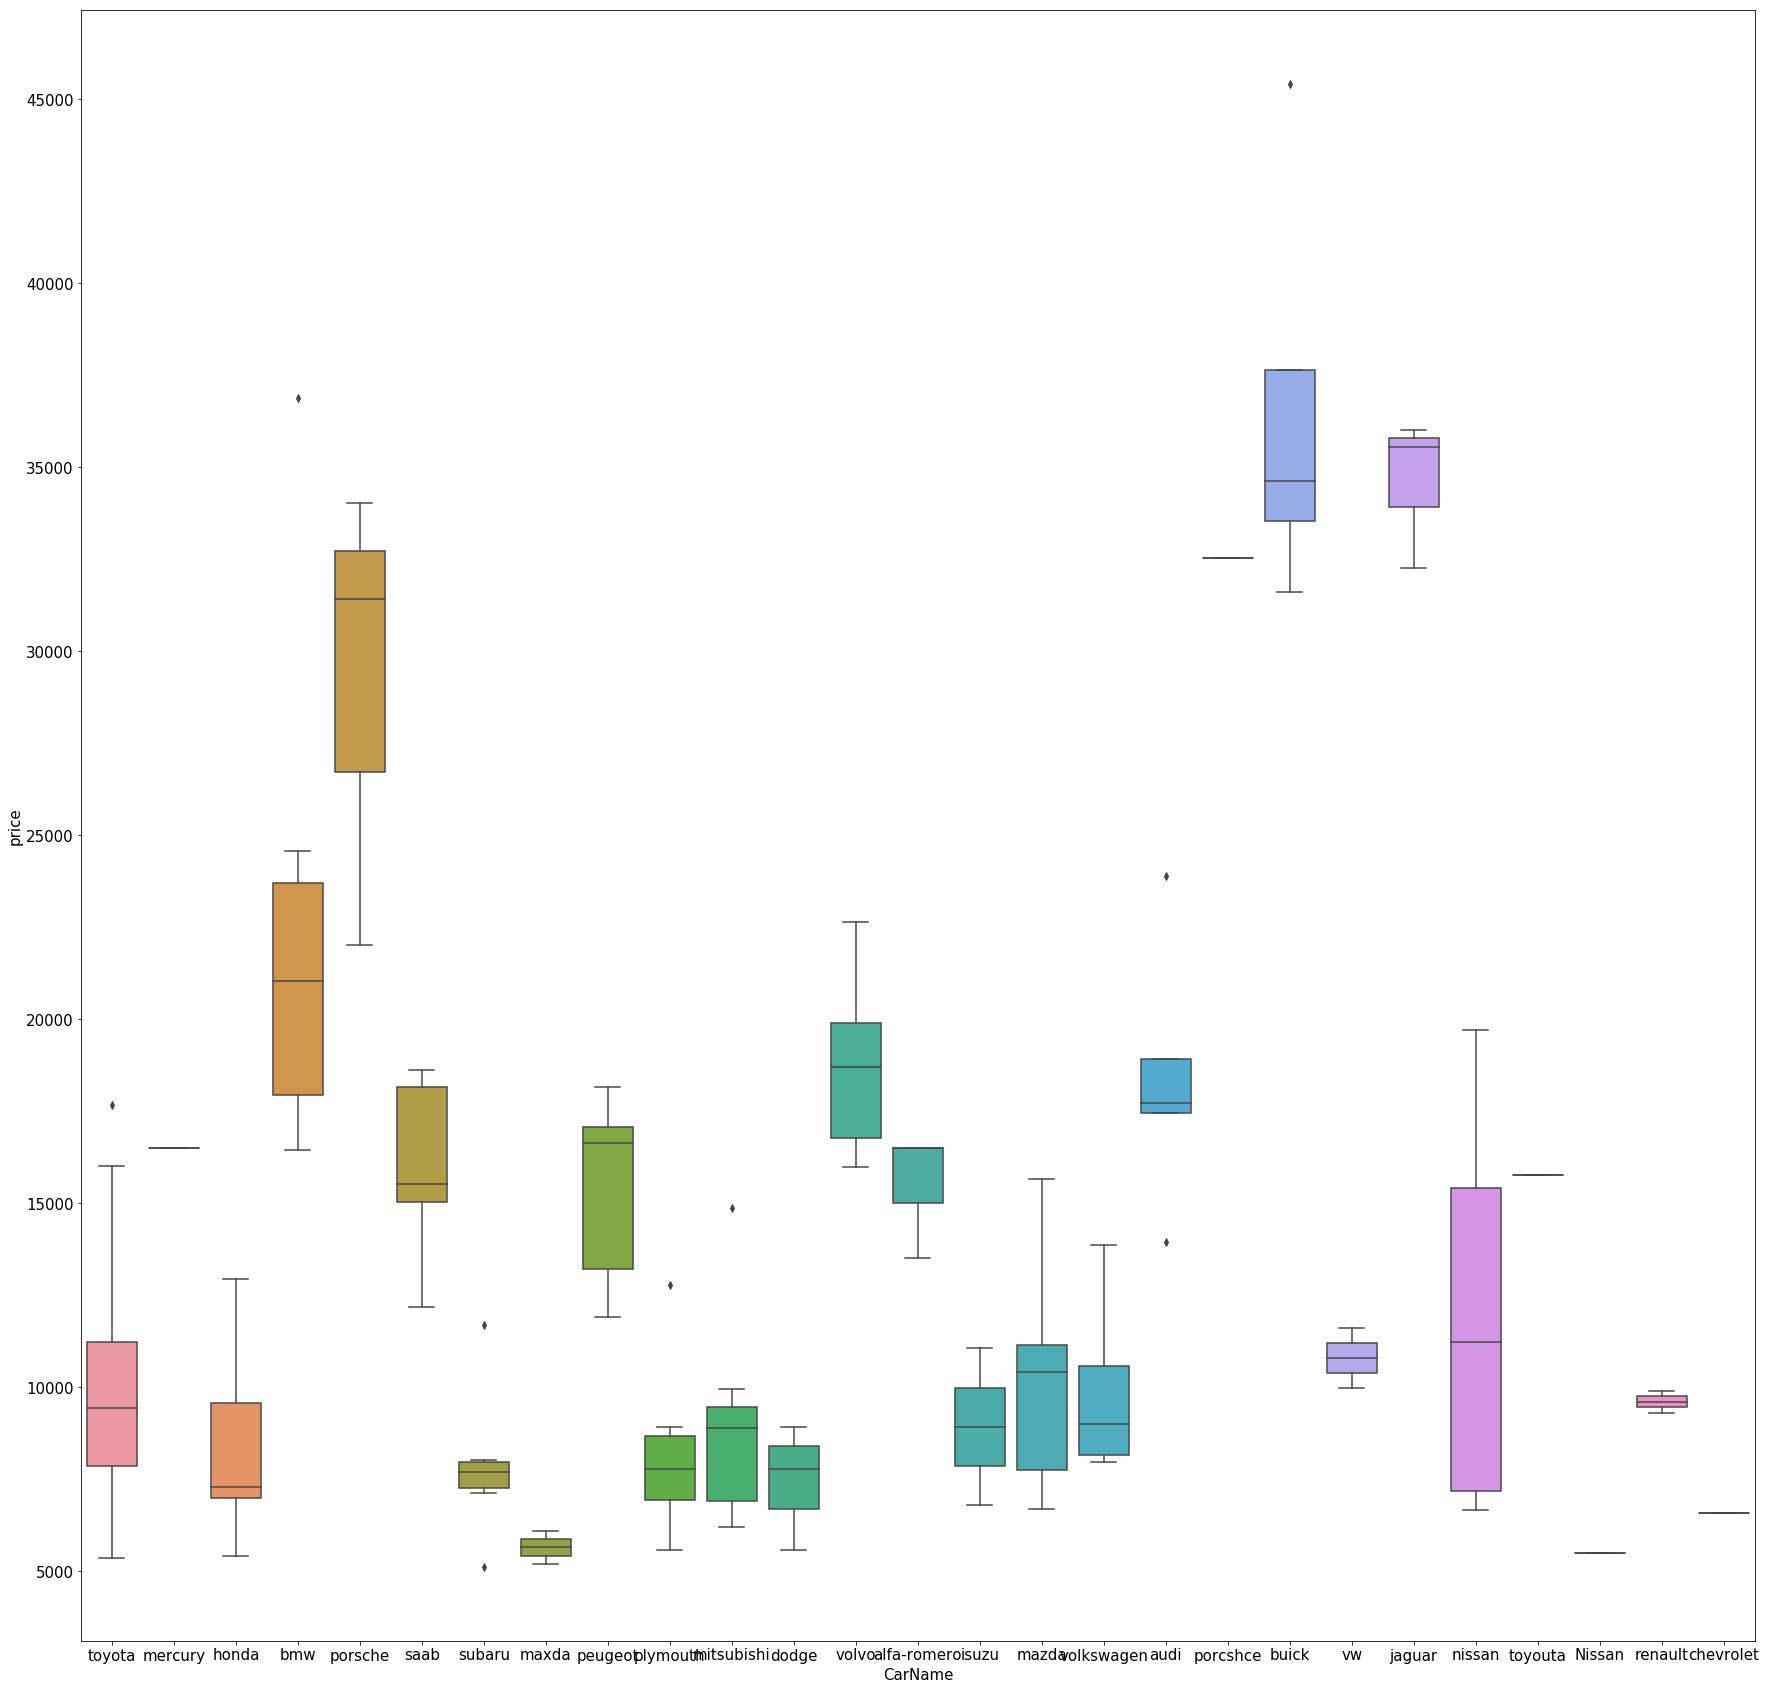

In [275]:
plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 15})
sns.boxplot(x='CarName',y='price',data=car)
plt.show()

In [276]:
#manual selection of categorical variables
cat_sel = ['carbody','drivewheel','enginelocation','aspiration','fueltype','doornumber','cylindernumber','fuelsystem']

In [277]:
#create dummies
sel = pd.DataFrame()
for col in cat_sel:
    make = pd.get_dummies(car[col],drop_first=True)
    sel = pd.concat([sel,make],axis=1)

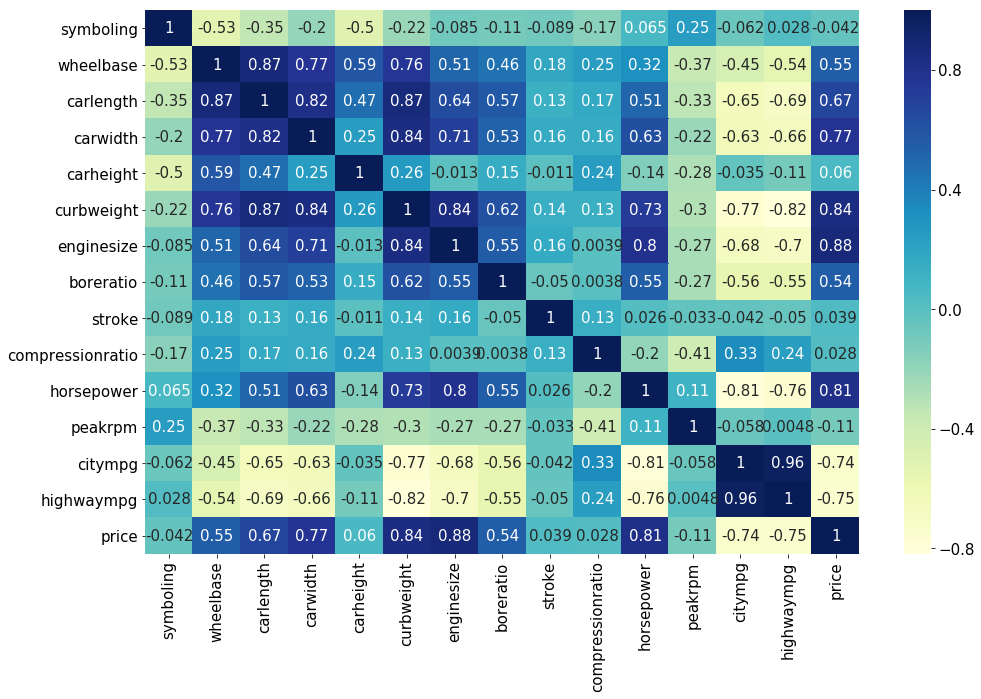

In [278]:
#correlation between ordinal and numeric variables
plt.figure(figsize=(16,10))
sns.heatmap(n_car.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Manual Filtering
#### Wheelbase is very related to car length and hence very correlated - dropping wheel base
#### curbwight should also depend on engine size and so it is highly correlated , we can choose either , both of them are also correlated to horsepower
#### symboling seems to have very negligible correlation with price , in fact negative
#### stroke has minimal correlation to either price or anything that correlates well to price
#### Based on the correlations to all other variables citympg and highwaympg look symmetric 
#### compression ratio has insignificant relation to any variable
#### peakrpm has insignificant relation to any variable

In [279]:
num_sel = ['carlength','enginesize','boreratio','highwaympg','carwidth','carheight']
sel = pd.concat([car[num_sel],sel],axis=1)

In [280]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
sel[sel.columns] = scalar.fit_transform(sel[sel.columns])

In [281]:
sel.describe()

carlength  enginesize   boreratio  highwaympg    carwidth   carheight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.518194    0.222711    0.557542    0.461990    0.398934    0.499301   
std      0.213919    0.161861    0.194528    0.201036    0.207804    0.206673   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.382759    0.109375    0.435714    0.290323    0.228571    0.350000   
50%      0.496552    0.195312    0.550000    0.451613    0.352381    0.525000   
75%      0.689655    0.277344    0.714286    0.580645    0.485714    0.658333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          hardtop   hatchback       sedan       wagon     ...            four  \
count  143.000000  143.000000  143.000000  143.000000     ...      143.000000   
mean     0.027972    0.328671    0.489510    0.118881     ...        0.797203   
std      0.165472    0.471381    0.501647    0.324786     ...        0.403496   
min      0.000000    0.000000    0.000000    0.000000     ...        0.000000   
25%      0.000000    0.000000    0.000000    0.000000     ...        1.000000   
50%      0.000000    0.000000    0.000000    0.000000     ...        1.000000   
75%      0.000000    1.000000    1.000000    0.000000     ...        1.000000   
max      1.000000    1.000000    1.000000    1.000000     ...        1.000000   

              six      twelve         two        2bbl        4bbl         idi  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.118881    0.006993    0.013986    0.300699    0.006993    0.083916   
std      0.324786    0.083624    0.117845    0.460174    0.083624    0.278236   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             mpfi        spdi        spfi  
count  143.000000  143.000000  143.000000  
mean     0.496503    0.041958    0.006993  
std      0.501745    0.201198    0.083624  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 27 columns]

In [284]:
import statsmodels.api as sm
sel_lm = sm.add_constant(sel)
lr = sm.OLS(car['price'],sel_lm).fit()
lr.params

const          7918.017743
carlength      1623.151309
enginesize    25568.956650
boreratio     -3306.379948
highwaympg      245.703250
carwidth       8826.149197
carheight      2216.562908
hardtop       -3111.415916
hatchback     -3293.448334
sedan         -2215.823115
wagon         -4651.145733
fwd           -1930.353140
rwd             163.238258
rear          14478.176088
turbo          2376.090451
gas            5356.108098
two            1024.779169
five          -3728.371599
four          -5898.824908
six           -5189.599681
twelve        -7121.376730
two            1024.779169
2bbl           -885.552258
4bbl          -1031.823900
idi            2561.909645
mpfi            -30.611269
spdi          -2109.097028
spfi           -398.823174
dtype: float64

In [285]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           3.91e-52
Time:                        23:51:52   Log-Likelihood:                -1305.4
No. Observations:                 143   AIC:                             2663.
Df Residuals:                     117   BIC:                             2740.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7918.0177   2350.029      3.369      0.001    3263.909    1.26e+04
carlength   1623.1513   3012.692      0.539      0.591   -4343.328    7589.630
enginesize  2.557e+04   5174.230      4.942      0.000    1.53e+04    3.58e+04
boreratio  -3306.3799   2050.188     -1.613      0.109   -7366.670     753.910
highwaympg   245.7032   2901.686      0.085      0.933   -5500.935    5992.341
carwidth    8826.1492   2790.252      3.163      0.002    3300.202    1.44e+04
carheight   2216.5629   1702.523      1.302      0.195   -1155.195    5588.320
hardtop    -3111.4159   2221.390     -1.401      0.164   -7510.763    1287.932
hatchback  -3293.4483   1357.313     -2.426      0.017   -5981.535    -605.362
sedan      -2215.8231   1411.005     -1.570      0.119   -5010.245     578.599
wagon      -4651.1457   1639.116     -2.838      0.005   -7897.330   -1404.962
fwd        -1930.3531   1381.594     -1.397      0.165   -4666.528     805.822
rwd          163.2383   1421.381      0.115      0.909   -2651.732    2978.209
rear        1.448e+04   2820.525      5.133      0.000    8892.275    2.01e+04
turbo       2376.0905    786.976      3.019      0.003     817.525    3934.656
gas         5356.1081   1231.331      4.350      0.000    2917.521    7794.695
two         1024.7792   1957.099      0.524      0.602   -2851.152    4900.710
five       -3728.3716   2280.552     -1.635      0.105   -8244.885     788.141
four       -5898.8249   2420.060     -2.437      0.016   -1.07e+04   -1106.023
six        -5189.5997   1883.585     -2.755      0.007   -8919.941   -1459.259
twelve     -7121.3767   3568.792     -1.995      0.048   -1.42e+04     -53.572
two         1024.7792   1957.099      0.524      0.602   -2851.152    4900.710
2bbl        -885.5523    996.452     -0.889      0.376   -2858.973    1087.869
4bbl       -1031.8239   3670.847     -0.281      0.779   -8301.743    6238.095
idi         2561.9096   1557.472      1.645      0.103    -522.581    5646.401
mpfi         -30.6113   1092.436     -0.028      0.978   -2194.123    2132.901
spdi       -2109.0970   1557.982     -1.354      0.178   -5194.598     976.404
spfi        -398.8232   2729.510     -0.146      0.884   -5804.475    5006.828
==============================================================================
Omnibus:                       11.929   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.508
Skew:                           0.401   Prob(JB):                     5.81e-05
Kurtosis:                       4.622   Cond. No.                     1.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.67e-30. This might indic

In [287]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(sel,car['price'])
rfe = RFE(lm,10)
rfe = rfe.fit(sel,car['price'])

In [288]:
list(zip(sel.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 10),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('highwaympg', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('hardtop', False, 3),
 ('hatchback', False, 4),
 ('sedan', False, 5),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', False, 17),
 ('rear', True, 1),
 ('turbo', False, 8),
 ('gas', False, 11),
 ('two', False, 12),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('twelve', True, 1),
 ('two', False, 2),
 ('2bbl', False, 14),
 ('4bbl', False, 13),
 ('idi', False, 7),
 ('mpfi', False, 18),
 ('spdi', False, 9),
 ('spfi', False, 15)]

In [289]:
import statsmodels.api as sm
col = sel.columns[rfe.support_]
x_train_lm = sm.add_constant(sel[col])
lr = sm.OLS(car['price'],x_train_lm).fit()
lr.params

const         10616.954664
enginesize    24510.237370
boreratio     -2418.363420
carwidth      12179.215952
wagon         -1502.007809
fwd           -2697.476650
rear          13501.941780
five          -2718.488046
four          -4962.997415
six           -4351.920791
twelve        -7607.132485
dtype: float64

In [290]:
lr.summary()
#Can drop boreratio
#Can drop five

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           1.35e-59
Time:                        23:52:45   Log-Likelihood:                -1323.3
No. Observations:                 143   AIC:                             2669.
Df Residuals:                     132   BIC:                             2701.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.062e+04   1646.100      6.450      0.000    7360.806    1.39e+04
enginesize  2.451e+04   3248.512      7.545      0.000    1.81e+04    3.09e+04
boreratio  -2418.3634   1908.126     -1.267      0.207   -6192.824    1356.097
carwidth    1.218e+04   2037.875      5.976      0.000    8148.098    1.62e+04
wagon      -1502.0078    702.201     -2.139      0.034   -2891.030    -112.986
fwd        -2697.4766    626.091     -4.308      0.000   -3935.947   -1459.007
rear         1.35e+04   2136.436      6.320      0.000    9275.860    1.77e+04
five       -2718.4880   1730.408     -1.571      0.119   -6141.406     704.430
four       -4962.9974   1360.029     -3.649      0.000   -7653.270   -2272.725
six        -4351.9208   1342.413     -3.242      0.002   -7007.347   -1696.495
twelve     -7607.1325   3302.285     -2.304      0.023   -1.41e+04   -1074.887
==============================================================================
Omnibus:                        8.592   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.029
Skew:                           0.466   Prob(JB):                       0.0109
Kurtosis:                       3.805   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Residual Analysis


In [291]:
y_hat = lr.predict(x_train_lm)
res = price-y_hat

/home/nautiyogi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


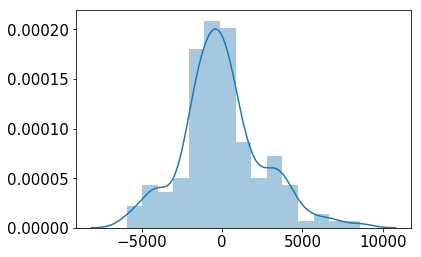

In [292]:
#error distribution
fig = plt.figure()
sns.distplot(res,bins=15)
plt.show()

In [ ]:
#predict
x_te_sm = sm.add_constant(car_te)
y_pred = lr.predict(x_te_sm)